Evap MSE:  0.015489123750000215


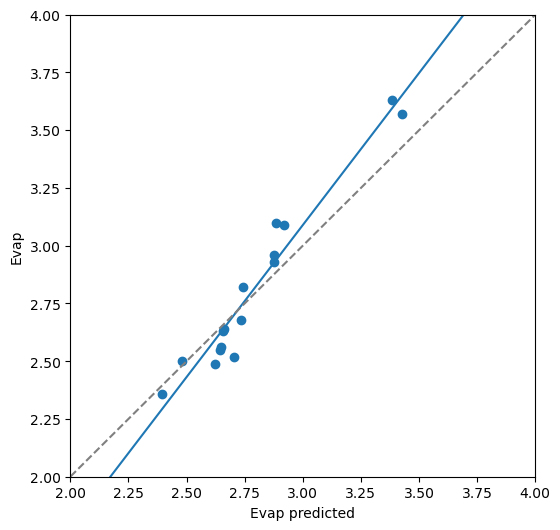

y = ax + b
(a = 1.3162875256959141, b = -0.8595315665639383)


In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#filename = input('Enter filename\n')
filename = "evap-rate-estimation.xlsx"
ans="Evap"
test_size = 0.4

df = pd.read_excel(filename, index_col=0)
col=df.columns.drop(ans)

X, Y = df[col], df[ans]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける

RF= RandomForestRegressor()
RF.fit(X_train, Y_train)
RF.fit(X, Y)

Y_test_pred  = RF.predict(X_test)

MSE=mean_squared_error(Y_test,Y_test_pred)
a,b=np.polyfit(Y_test_pred,Y_test,1) #linear approximation
print(ans+" MSE: ",MSE)


plt.figure(figsize=(6,6))
plt.scatter(Y_test_pred,Y_test)
plt.xlabel(ans+" predicted")
plt.ylabel(ans)
plt.xlim(2,4)
plt.ylim(2,4)
plt.plot([0,5],[b,a*5+b])#linear approximation
plt.plot([0,5],[0,5], linestyle="dashed", color='gray') #ideal prediction
plt.show()
print('y = ax + b\n' + '(a = ' + str(a) + ', b = ' + str(b) + ')')

In [58]:
# For prediction, input your parameters
test_array = []

if not input_option == 'DONE':
    values = []
    for i in range(len(col)):
        val = float(input('input ' + col[i] + '\n '))
        values.append(val)
    
test_array.append(values)
ndarray = np.array(test_array)
test_frame = pd.DataFrame(ndarray, columns=col)
Y_test_prediction = RF.predict(test_frame)
print('Estimated evaporation rate is... ' + str(Y_test_prediction) + ' g/h\n')

est_evap = a * Y_test_prediction[0] + b
print(Y_test_prediction, est_evap)

Estimated evaporation rate is... [2.9271] g/h

[2.9271] 2.9933736499005725


In [34]:
input_option = 'DONE'
# input_option = ''

# reproduce 10 times

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=1) #X,YをAIに学習させるデータと、テスト用のデータに分ける

pred_array = []
for i in range(10):
    RF= RandomForestRegressor()
    RF.fit(X_train, Y_train)
    RF.fit(X, Y)
    Y_test_pred  = RF.predict(X_test)
    MSE=mean_squared_error(Y_test,Y_test_pred)
    a,b=np.polyfit(Y_test_pred,Y_test,1) #linear approximation
    # For prediction, input your parameters
    test_frame = pd.DataFrame(ndarray, columns=col)
    Y_test_prediction = RF.predict(test_frame)
    est_evap = a * Y_test_prediction[0] + b
    pred_array.append([MSE, Y_test_prediction[0], est_evap])

pred_array = np.array(pred_array, dtype=object)
prediction = pd.DataFrame(pred_array, columns=['MSE', 'Prediction', 'Modified'])
prediction

,MSE,Prediction,Modified
0,0.01465,2.9222,2.965907
1,0.015185,2.9114,2.968889
2,0.013344,2.9313,2.991595
3,0.013325,2.8767,2.917426
4,0.015351,2.9289,2.998473
5,0.015582,2.9298,2.988456
6,0.018075,2.8796,2.951124
7,0.018555,2.9174,2.993881
8,0.01693,2.9053,2.980508
9,0.013835,2.9247,2.991229
